In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [36]:
dataset= pd.read_csv('F:/numdataset/credit_cardCustomer.csv')
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [37]:
dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [38]:
dataset.columns = ['CLIENTNUM', 'AttritionFlag', 'CustomerAge', 'Gender',
       'Dependentcount', 'EducationLevel', 'MaritalStatus',
       'IncomeCategory', 'CardCategory', 'MonthsOnBook',
       'TotalRelationshipCount', 'MonthsInactive12mon',
       'ContactsCount12mon', 'CreditLimit', 'TotalRevolvingBal',
       'AvgOpenToBuy', 'TotalAmtChngQ4_Q1', 'TotalTransAmt',
       'TotalTransCt', 'TotalCtChngQ4_Q1', 'AvgUtilizationRatio',
       'NaiveClassifiermon1',
       'NaiveClassifiermon2']

In [39]:
dataset.columns

Index(['CLIENTNUM', 'AttritionFlag', 'CustomerAge', 'Gender', 'Dependentcount',
       'EducationLevel', 'MaritalStatus', 'IncomeCategory', 'CardCategory',
       'MonthsOnBook', 'TotalRelationshipCount', 'MonthsInactive12mon',
       'ContactsCount12mon', 'CreditLimit', 'TotalRevolvingBal',
       'AvgOpenToBuy', 'TotalAmtChngQ4_Q1', 'TotalTransAmt', 'TotalTransCt',
       'TotalCtChngQ4_Q1', 'AvgUtilizationRatio', 'NaiveClassifiermon1',
       'NaiveClassifiermon2'],
      dtype='object')

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLIENTNUM               10127 non-null  int64  
 1   AttritionFlag           10127 non-null  object 
 2   CustomerAge             10127 non-null  int64  
 3   Gender                  10127 non-null  object 
 4   Dependentcount          10127 non-null  int64  
 5   EducationLevel          10127 non-null  object 
 6   MaritalStatus           10127 non-null  object 
 7   IncomeCategory          10127 non-null  object 
 8   CardCategory            10127 non-null  object 
 9   MonthsOnBook            10127 non-null  int64  
 10  TotalRelationshipCount  10127 non-null  int64  
 11  MonthsInactive12mon     10127 non-null  int64  
 12  ContactsCount12mon      10127 non-null  int64  
 13  CreditLimit             10127 non-null  float64
 14  TotalRevolvingBal       10127 non-null

In [41]:
dataset.isnull().sum()

CLIENTNUM                 0
AttritionFlag             0
CustomerAge               0
Gender                    0
Dependentcount            0
EducationLevel            0
MaritalStatus             0
IncomeCategory            0
CardCategory              0
MonthsOnBook              0
TotalRelationshipCount    0
MonthsInactive12mon       0
ContactsCount12mon        0
CreditLimit               0
TotalRevolvingBal         0
AvgOpenToBuy              0
TotalAmtChngQ4_Q1         0
TotalTransAmt             0
TotalTransCt              0
TotalCtChngQ4_Q1          0
AvgUtilizationRatio       0
NaiveClassifiermon1       0
NaiveClassifiermon2       0
dtype: int64

In [42]:
cat_columns = dataset.select_dtypes(include = ['object']).nunique(dropna=False)
print(cat_columns)

AttritionFlag     2
Gender            2
EducationLevel    7
MaritalStatus     4
IncomeCategory    6
CardCategory      4
dtype: int64


In [43]:
dataset = dataset.drop('CLIENTNUM', axis=1)
dataset = dataset.drop(columns=['NaiveClassifiermon1','NaiveClassifiermon2'], axis=1)

Existing Customer    8500
Attrited Customer    1627
Name: AttritionFlag, dtype: int64


<AxesSubplot:xlabel='AttritionFlag', ylabel='count'>

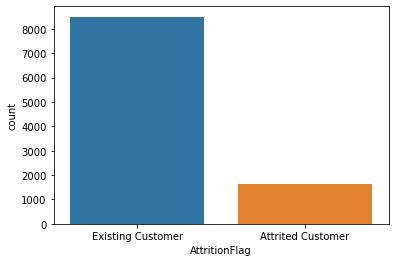

In [44]:
import seaborn as sns

# target is Attrition_Flag
print(dataset['AttritionFlag'].value_counts())
sns.countplot(x="AttritionFlag", data=dataset)

<AxesSubplot:xlabel='Gender'>

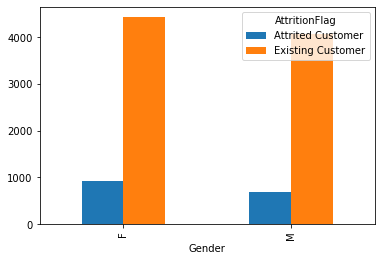

In [45]:
pt = dataset[['Gender','AttritionFlag']].pivot_table(index='Gender', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()

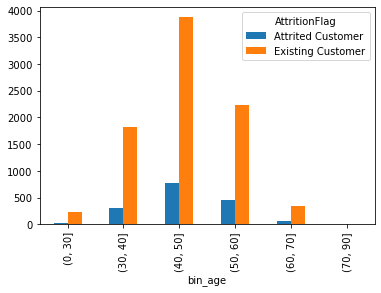

In [46]:
dataset['bin_age'] = pd.cut(dataset.CustomerAge, [0,30,40,50,60,70,90])

pt = dataset[['bin_age','AttritionFlag']].pivot_table(index='bin_age', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()
dataset = dataset.drop('bin_age', axis=1)

<AxesSubplot:xlabel='IncomeCategory'>

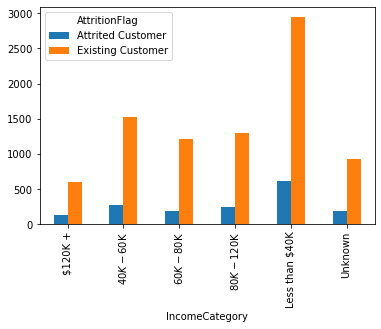

In [47]:
pt = dataset[['IncomeCategory','AttritionFlag']].pivot_table(index='IncomeCategory', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()

<AxesSubplot:xlabel='CardCategory'>

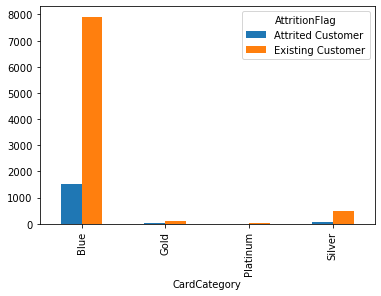

In [48]:
pt = dataset[['CardCategory','AttritionFlag']].pivot_table(index='CardCategory', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()

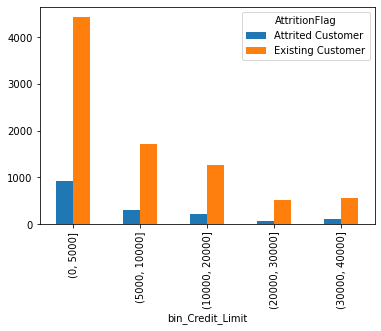

In [49]:
dataset['bin_Credit_Limit'] = pd.cut(dataset.CreditLimit, [0,5000,10000,20000,30000,40000])

pt = dataset[['bin_Credit_Limit','AttritionFlag']].pivot_table(index='bin_Credit_Limit', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()
dataset = dataset.drop('bin_Credit_Limit', axis=1)

<AxesSubplot:xlabel='TotalRelationshipCount'>

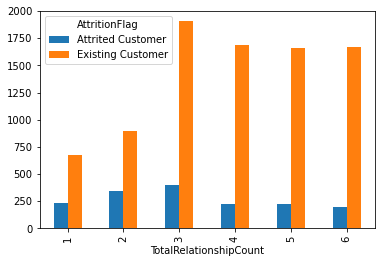

In [50]:
pt = dataset[['TotalRelationshipCount','AttritionFlag']].pivot_table(index='TotalRelationshipCount', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()

<AxesSubplot:xlabel='MonthsInactive12mon'>

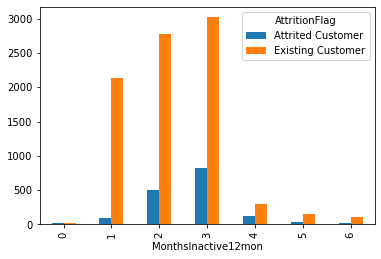

In [51]:
pt = dataset[['MonthsInactive12mon','AttritionFlag']].pivot_table(index='MonthsInactive12mon', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()

In [52]:
dataset['AttritionFlag'] = dataset['AttritionFlag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
dataset['AttritionFlag'].value_counts()

0    8500
1    1627
Name: AttritionFlag, dtype: int64

In [53]:
dataset['Gender'] = dataset['Gender'].replace({'F': 0, 'M': 1})
dataset['Gender'].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numerical_features = dataset.select_dtypes(exclude=['object'])
numerical_features = numerical_features.drop(['AttritionFlag', 'Gender'], axis=1)
dataset[numerical_features.columns] = sc.fit_transform(numerical_features)

In [55]:
categorical_features = dataset.select_dtypes(include=['object']).columns.values.tolist()
dataset = pd.get_dummies(dataset, columns=categorical_features)
dataset.head()

,AttritionFlag,CustomerAge,Gender,Dependentcount,MonthsOnBook,TotalRelationshipCount,MonthsInactive12mon,ContactsCount12mon,CreditLimit,TotalRevolvingBal,...,IncomeCategory_$120K +,IncomeCategory_$40K - $60K,IncomeCategory_$60K - $80K,IncomeCategory_$80K - $120K,IncomeCategory_Less than $40K,IncomeCategory_Unknown,CardCategory_Blue,CardCategory_Gold,CardCategory_Platinum,CardCategory_Silver
0,0,-0.165406,1,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,...,0,0,1,0,0,0,1,0,0,0
1,0,0.333570,0,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,...,0,0,0,0,1,0,1,0,0,0
2,0,0.583058,1,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,...,0,0,0,1,0,0,1,0,0,0
3,0,-0.789126,0,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,...,0,0,0,0,1,0,1,0,0,0
4,0,-0.789126,1,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,...,0,0,1,0,0,0,1,0,0,0


In [56]:
dataset.shape

(10127, 37)

In [57]:
y = dataset['AttritionFlag']
X = dataset.drop('AttritionFlag', axis=1)

In [58]:
from sklearn.decomposition import PCA
pca = PCA(0.95) 
pca.fit(X)
X_pca = pca.transform(X)

print(f'Shape of X before PCA: {X.shape}')
print(f'Shape of X after PCA: {X_pca.shape}')

Shape of X before PCA: (10127, 36)
Shape of X after PCA: (10127, 20)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [73]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from keras.layers import Dropout ,Dense


model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))


model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))



model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt =  tf.keras.optimizers.Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 10, epochs = 200, validation_split=0.2)

Epoch 1/200
648/648 [==============================] - 1s 2ms/step - loss: 0.6303 - accuracy: 0.8418 - val_loss: 0.4458 - val_accuracy: 0.8390
Epoch 2/200
648/648 [==============================] - 1s 1ms/step - loss: 0.3858 - accuracy: 0.8423 - val_loss: 0.3192 - val_accuracy: 0.8390
Epoch 3/200
648/648 [==============================] - 1s 1ms/step - loss: 0.3425 - accuracy: 0.8423 - val_loss: 0.2985 - val_accuracy: 0.8390
Epoch 4/200
648/648 [==============================] - 1s 1ms/step - loss: 0.3306 - accuracy: 0.8586 - val_loss: 0.2888 - val_accuracy: 0.8846
Epoch 5/200
648/648 [==============================] - 1s 1ms/step - loss: 0.3162 - accuracy: 0.8756 - val_loss: 0.2817 - val_accuracy: 0.8933
Epoch 6/200
648/648 [==============================] - 1s 1ms/step - loss: 0.3162 - accuracy: 0.8886 - val_loss: 0.2759 - val_accuracy: 0.9025
Epoch 7/200
648/648 [==============================] - 1s 1ms/step - loss: 0.3078 - accuracy: 0.8910 - val_loss: 0.2703 - val_accuracy: 0.9044

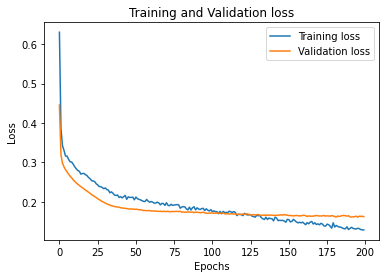

In [74]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

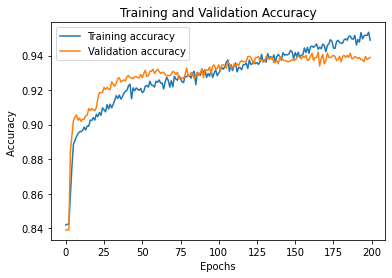

In [75]:
plt.plot(history_df.loc[:, ['accuracy']], label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy ')
plt.legend(loc="best")

plt.show()

In [82]:

y_pred = model.predict(X_test)

AUC: 96.92%
Best threshold value is: 0.14591491


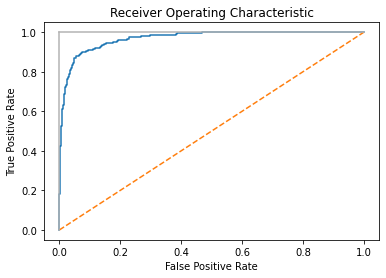

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)

# Print model AUC
print("AUC: %.2f%%" % (roc_auc_score(y_test, y_pred) * 100.0))

# Print best threshold
optimal_idx = np.argmax(true_positive_rate - false_positive_rate)
optimal_threshold = threshold[optimal_idx]
print("Best threshold value is:", optimal_threshold)

# Ploting ROC curves
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [90]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.metrics import *

y_pred=[1 if x>0.7 else 0 for x in y_pred]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1682
           1       0.89      0.70      0.78       344

    accuracy                           0.93      2026
   macro avg       0.92      0.84      0.87      2026
weighted avg       0.93      0.93      0.93      2026



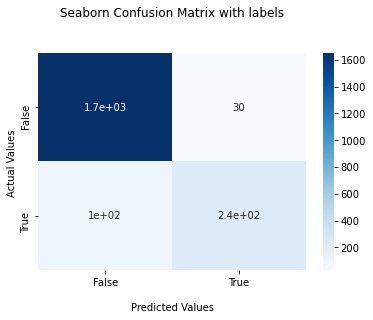

In [91]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()